# Pandas projekt

## Dataset
 Vi arbejder med et dataset fra Kaggle, som indeholder data om de 50 mest afspillede sange på Spotify i 73 lande, over en længere periode.
 https://www.kaggle.com/datasets/anandshaw2001/top-spotify-songs-in-73-countries
 
 Datasettet indeholder følgende kolonner:
 - spotify_id: Unik id for sangen
 - name: Sangens titel
 - artists: Kunstner(e) bag sangen
 - daily_rank: Dagens placering på top-10 listen
 - daily_movement: Ændring i forhold til dagen før
 - weekly_movement: Ændring i forhold til ugen før
 - country: Landet hvor data er indsamlet
 - snapshot_date: Dato for dataindsamling
 - popularity: Popularitetsscore
 - is_explicit: Angiver om sangen indeholder stødende sprog
 - duration_ms: Længden af sangen i millisekunder
 - album_name: Navn på albummet
 - album_release_date: Udgivelsesdato for albummet
 - danceability: Et mål for hvor dansevenlig sangen er
 - energy: Et mål for hvor energisk sangen er
 - key: Tonearten sangen er skrevet i
 - loudness: Lydstyrken af sangen
 - mode: Skalaen sangen er skrevet i
 - speechiness: Et mål for hvor meget tale der er i sangen
 - acousticness: Et mål for hvor meget af sangen der er akustisk
 - instrumentalness: Et mål for hvor meget af sangen der er instrumental
 - liveness: Et mål for hvor meget af sangen der er live
 - valence: Et mål for hvor positiv sangen er
 - tempo: Sangens tempo
 - time_signature: Taktarten for sangen

##  mål
 - Fjerne unødvendige kolonner.
 - Konvertere datoerne til datetime format.
 - Reducere dataen til at vise sange for samme dag.
 - Reducere dataen til at vise sange for samme land.
 - Udtrække kunstnerne fra kommasepareret liste.
 - Find ud af hvilke kunstnere der er nævnt flest gange i top-50 mest afspillede sange.
 - Find ud af hvilke sange der er mest populære i top-50 mest afspillede sange.


In [187]:
import pandas as pd
import numpy as np
import matplotlib as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set pandas options
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Først indlæser vi dataen
Vi indlæser dataen fra kaggles hjemmeside så vi ikke behøver at downloade dataen og uploade den til Github.

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]


# Set the path to the file you'd like to load
file_path = "Top_spotify_songs.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "anandshaw2001/top-spotify-songs-in-73-countries",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())
df.head()

C:\Users\kenn7\AppData\Local\Temp\ipykernel_18120\2584574572.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  hf_dataset = kagglehub.load_dataset(


AttributeError: 'Dataset' object has no attribute 'head'

# Vi fjerner unødvendige kolonner og konvertere datoerne til et læsbart format.

In [179]:
# Drop the 12 last columns
mostImportant = df.drop(df.columns[12:], axis=1)
mostImportant.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,1,0,NaN,2025-02-17,98,False,251667,Die With A Smile
1,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",2,1,4,NaN,2025-02-17,90,False,177598,GNX
2,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,3,-2,8,NaN,2025-02-17,92,True,274192,Not Like Us
3,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",4,0,-2,NaN,2025-02-17,89,False,169917,rosie
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,-2,NaN,2025-02-17,96,False,210373,HIT ME HARD AND SOFT


In [180]:
reformattedData = mostImportant.copy()

# Konvertiere varighed til læsbart format (mm:ss)
reformattedData['duration_ms'] = reformattedData['duration_ms'].apply(
    lambda x: "%d:%02d" % divmod(x / 1000, 60)
)
reformattedData.rename(columns={'duration_ms': 'duration (mm:ss)'}, inplace=True)

reformattedData.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration (mm:ss),album_name
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,1,0,NaN,2025-02-17,98,False,4:11,Die With A Smile
1,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",2,1,4,NaN,2025-02-17,90,False,2:57,GNX
2,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,3,-2,8,NaN,2025-02-17,92,True,4:34,Not Like Us
3,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",4,0,-2,NaN,2025-02-17,89,False,2:49,rosie
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,-2,NaN,2025-02-17,96,False,3:30,HIT ME HARD AND SOFT


# Vi reducerer dataen til at vise sange for samme dag og land.
Det skulle gerne give os en liste over de 50 mest afspillede sange i det valgte land.

In [181]:
danishData = reformattedData[reformattedData['country'] == 'DK']
danishData.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration (mm:ss),album_name
2738,2EVJSQTl0bqHISNlJbhNIc,Blodigt (feat. Annika),"Anton Westerlin, Annika",1,0,0,DK,2025-02-17,65,True,3:02,Blodigt (feat. Annika)
2739,366GW0RsHtjyGeJSg0u9Ux,når verden vælter,Gobs,2,1,48,DK,2025-02-17,49,False,2:59,når verden vælter
2740,2v5RxyOtY5uSH2EAtz94SL,Du ligner din mor,"Benjamin Hav, Lukas Graham",3,-1,0,DK,2025-02-17,53,False,3:07,"Jeg vil bare gerne være et godt menneske, men ..."
2741,4GZt2BpQpWhkEAgmfUrQOu,Luk Mig Ind,Annika,4,0,0,DK,2025-02-17,64,False,3:17,Luk Mig Ind
2742,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,5,0,36,DK,2025-02-17,92,True,4:34,Not Like Us


In [182]:
# Find den seneste dato i datasættet
most_recent_date = danishData['snapshot_date'].max()

# Reducer datasættet til kun at indeholde data for den seneste dato
mostRecentTop50  = danishData[danishData['snapshot_date'] == most_recent_date]

# Sorter data efter daily_rank
mostRecentTop50 = mostRecentTop50.sort_values(by='daily_rank', ascending=True)

mostRecentTop50.head(50)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration (mm:ss),album_name
2738,2EVJSQTl0bqHISNlJbhNIc,Blodigt (feat. Annika),"Anton Westerlin, Annika",1,0,0,DK,2025-02-17,65,True,3:02,Blodigt (feat. Annika)
2739,366GW0RsHtjyGeJSg0u9Ux,når verden vælter,Gobs,2,1,48,DK,2025-02-17,49,False,2:59,når verden vælter
2740,2v5RxyOtY5uSH2EAtz94SL,Du ligner din mor,"Benjamin Hav, Lukas Graham",3,-1,0,DK,2025-02-17,53,False,3:07,"Jeg vil bare gerne være et godt menneske, men ..."
2741,4GZt2BpQpWhkEAgmfUrQOu,Luk Mig Ind,Annika,4,0,0,DK,2025-02-17,64,False,3:17,Luk Mig Ind
2742,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,5,0,36,DK,2025-02-17,92,True,4:34,Not Like Us
2743,2p4cYfKQbg8xHXNG4eQaGo,Hele Vejen (feat. Mumle),"Omar, Mumle",6,2,3,DK,2025-02-17,54,False,2:57,Hele Vejen (feat. Mumle)
2744,3GCdLUSnKSMJhs4Tj6CV3s,All The Stars (with SZA),"Kendrick Lamar, SZA",7,-1,43,DK,2025-02-17,90,True,3:52,Black Panther The Album Music From And Inspire...
2745,5zaXybxrzGiDd6IPWIHheW,SIKKE EN TYPE,"Zuloo, Lamin",8,-1,-6,DK,2025-02-17,60,True,2:19,SIKKE EN TYPE
2746,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",9,1,-1,DK,2025-02-17,98,False,4:11,Die With A Smile
2747,7px3lmdf4nzNEMt6zaQ5yJ,SAMMEN,"Marstein, Annika",10,-1,-4,DK,2025-02-17,67,True,2:58,FRIHET I LENKER


# Vi udtrækker kunstnerne fra dataen i en ny DataFrame.
Fordi kunstnerne er gemt som en kommasepareret liste, er det nødvendigt at splitte dem op.

In [183]:
# Split alle kunstnere op i en liste så hver række kun har en kunstner
uniqueArtistRows = pd.DataFrame(mostRecentTop50['artists'].str.split(',').tolist(),).stack().reset_index(drop=True)


uniqueArtistRows.info()

<class 'pandas.core.series.Series'>
RangeIndex: 78 entries, 0 to 77
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
78 non-null     object
dtypes: object(1)
memory usage: 756.0+ bytes


# Vi finder ud af hvilke kunstnere der er nævnt flest gange i top-50 mest afspillede sange.
Det skulle gerne give os en liste over de mest populære kunstnere i det valgte land.

In [184]:
# Tæl antallet af gange samme kunstner optræder i datasættet
artistAppearances = uniqueArtistRows.value_counts().reset_index().copy()

artistAppearances.columns = ['artist_name', 'song_count']
artistAppearances = artistAppearances.sort_values(by='song_count', ascending=False)

artistAppearances.head()


,artist_name,song_count
0,Annika,5
1,Kendrick Lamar,4
2,Lamin,3
8,Bruno Mars,2
13,Teddy Swims,2


<Axes: title={'center': 'Top artists with the most songs in top 50 on 2025-02-17'}, ylabel='artist_name'>

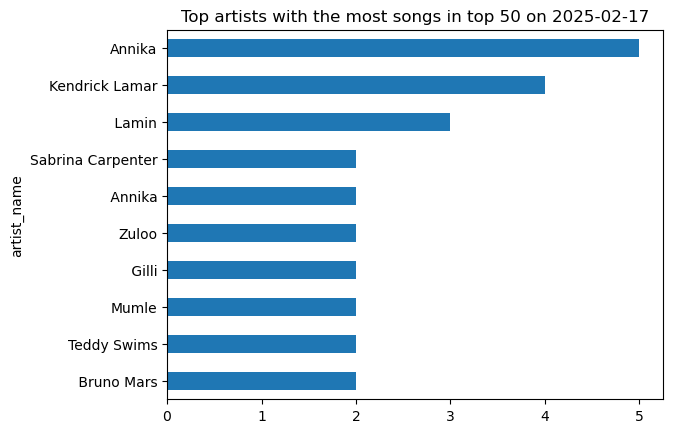

In [185]:
top10 = artistAppearances.head(10).sort_values(by='song_count', ascending=True).copy()
top10.plot(kind="barh", x='artist_name', y='song_count', title='Top artists with the most songs in top 50 on '+most_recent_date, legend=False)